In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score
)

In [2]:
data = pd.read_csv(filepath_or_buffer = "C:\\Users\\lopez\\OneDrive\\Documentos\\BD\\diabetes.csv", sep=',',low_memory=False)

In [3]:
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print("\nInformación del dataset:")
print(data.info())
print("\nValores nulos por columna:\n", data.isnull().sum())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Valores nulos por columna:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0


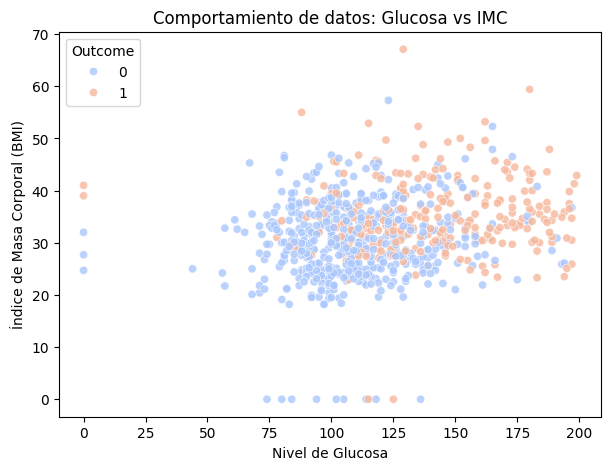

In [5]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=data,
    x="Glucose",
    y="BMI",
    hue="Outcome",
    palette="coolwarm",
    alpha=0.8
)
plt.title("Comportamiento de datos: Glucosa vs IMC")
plt.xlabel("Nivel de Glucosa")
plt.ylabel("Índice de Masa Corporal (BMI)")
plt.show()

In [6]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Escalamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0, 0.5, 1]
}

log_reg = LogisticRegression(max_iter=2000)

grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits

Mejores hiperparámetros encontrados:
{'C': 0.1, 'l1_ratio': 0.5, 'penalty': 'elasticnet', 'solver': 'saga'}
Mejor puntuación de validación cruzada: 0.7687858190057311


C:\Users\user\uteq\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
150 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\uteq\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\user\uteq\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\user\uteq\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1218, in fit
    solver = _check_solver(self.solv

In [8]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

# Predicciones
y_pred = best_model.predict(X_test_scaled)


MATRIZ DE CONFUSIÓN:


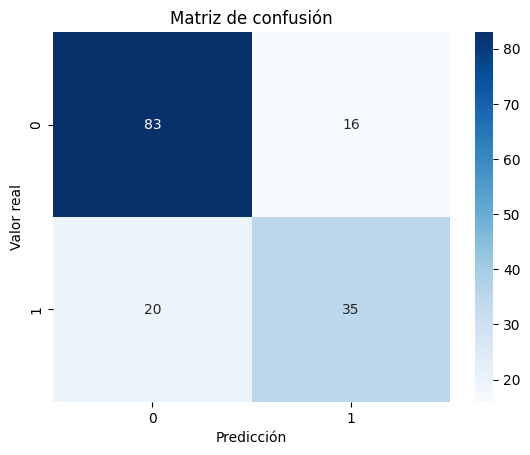


REPORTE DE CLASIFICACIÓN:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

Exactitud del modelo: 0.7662337662337663


In [9]:
print("\nMATRIZ DE CONFUSIÓN:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Valor real")
plt.show()

print("\nREPORTE DE CLASIFICACIÓN:")
print(classification_report(y_test, y_pred))
print("Exactitud del modelo:", accuracy_score(y_test, y_pred))

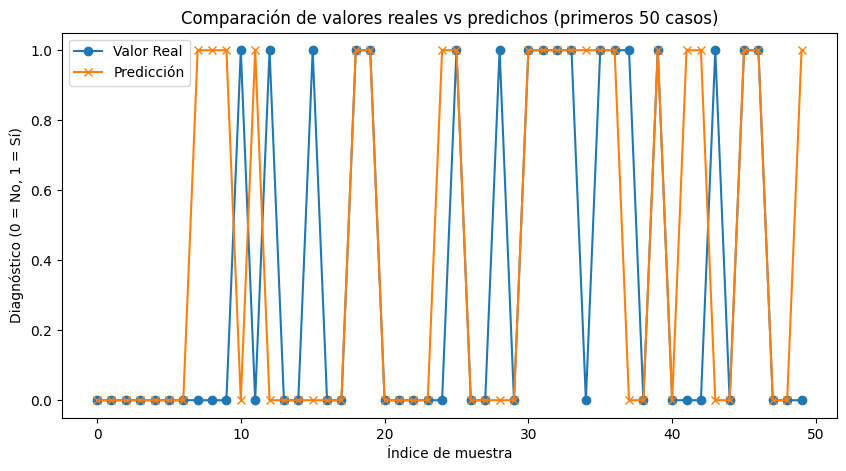

In [10]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:50], label="Valor Real", marker='o')
plt.plot(y_pred[:50], label="Predicción", marker='x')
plt.title("Comparación de valores reales vs predichos (primeros 50 casos)")
plt.xlabel("Índice de muestra")
plt.ylabel("Diagnóstico (0 = No, 1 = Sí)")
plt.legend()
plt.show()